# 13wk-49: 키와 몸무게 (결측치, 성별교호작용) / 자료분석(Autogluon)

최규빈  
2023-12-01

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-wlppn6TBGZYzyd9FOp1uB9&si=6MMfePEnviGCFWbE>

# 2. Imports

In [12]:
#!pip install autogluon.eda

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#---#
from autogluon.tabular import TabularPredictor
import autogluon.eda.auto as auto
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/height_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/master/posts/mid/height_test.csv')

In [4]:
df_train.head()

`-` 중간고사 문제였죠?

`-` 자료컨셉

-   성별간 교호작용 존재
-   결측치 존재 (성별로 결측치를 처리해야 좋았음)

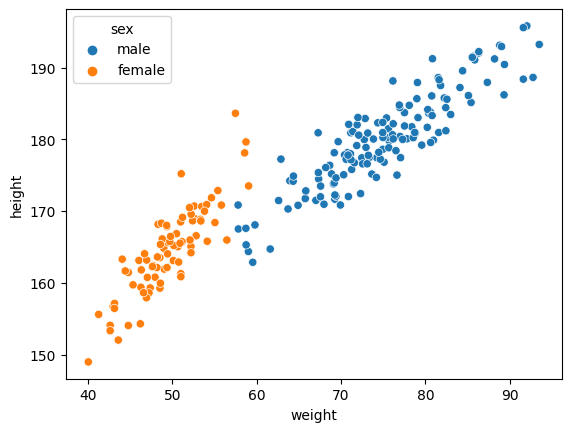

In [7]:
sns.scatterplot(df_train, x='weight',y='height',hue='sex')

# 4. 적합

In [8]:
# step1 -- pass
# step2 
predictr = TabularPredictor(label='height')
# step3 
predictr.fit(df_train) 
# step4 
yhat = predictr.predict(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231201_095220/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231201_095220/"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #26~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Jul 13 16:27:29 UTC 2
Disk Space Avail:   248.45 GB / 490.57 GB (50.6%)
Train Data Rows:    280
Train Data Columns: 2
Label Column: height
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
    Label info (max, min, mean, stddev): (195.79716947992372, 148.97529810482766, 174.60543, 9.4301)
    If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess 

[1000]  valid_set's rmse: 3.05149

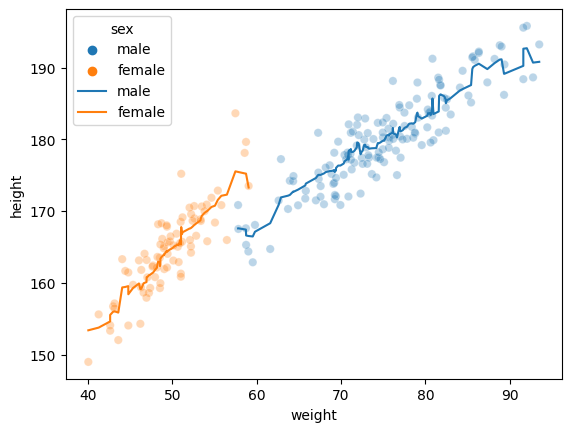

In [10]:
sns.scatterplot(df_train, x='weight',y='height',hue='sex',alpha=0.3)
sns.lineplot(df_train, x='weight',y=yhat,hue='sex')

In [11]:
predictr.leaderboard(silent=True)

# 5. 해석 및 시각화

## A. y의 분포, (X,y)의 관계 시각화

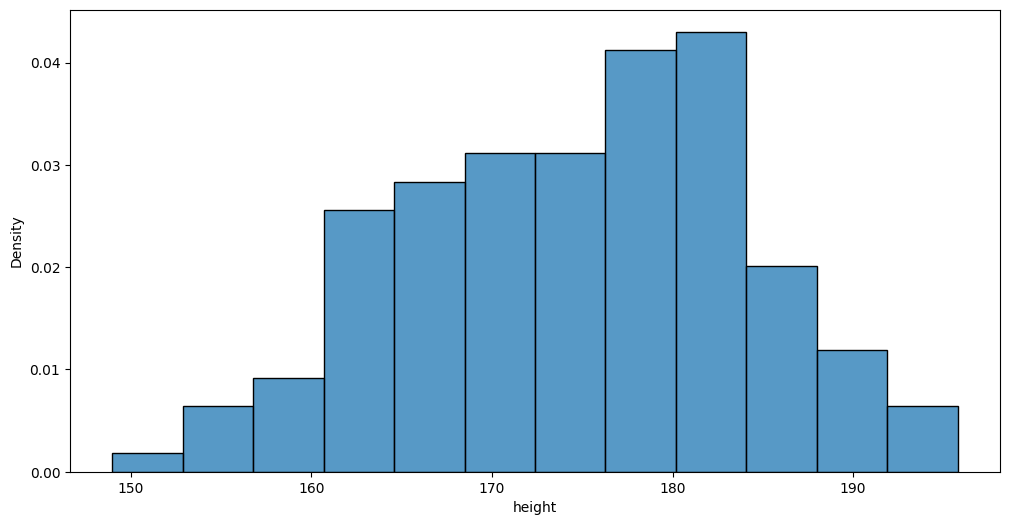

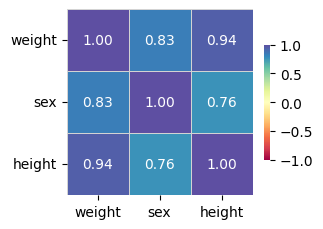

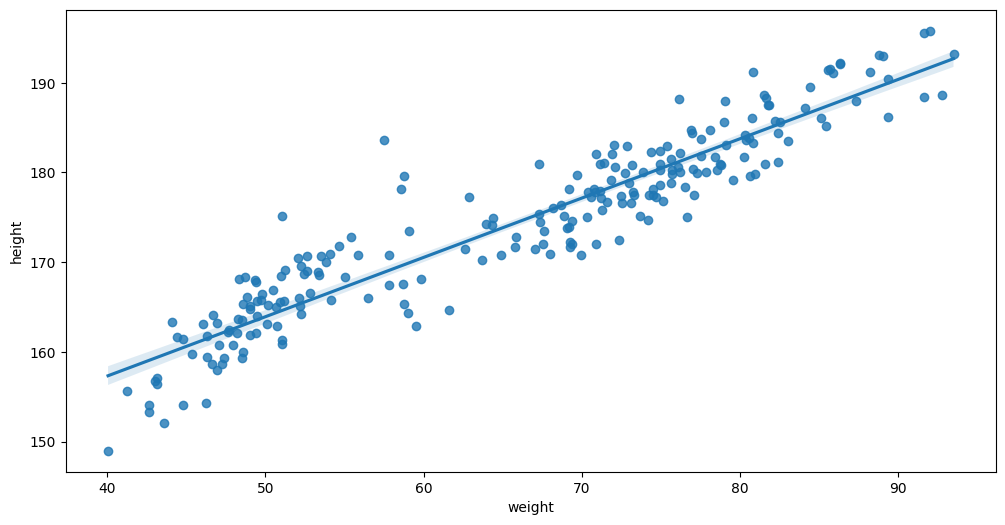

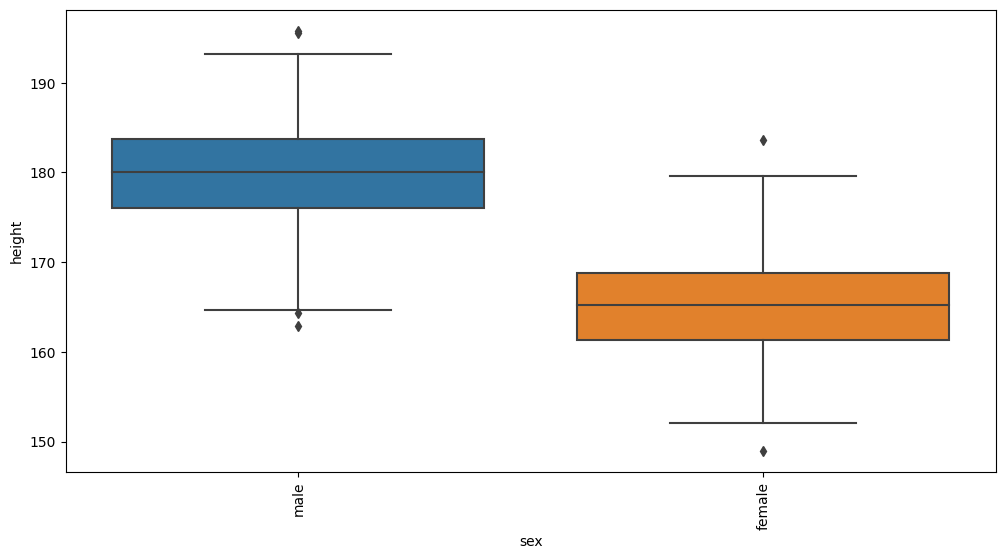

In [15]:
auto.target_analysis(
    train_data=df_train,
    label='height',
    fit_distributions=False
)

## B. 중요한 설명변수?

No path specified. Models will be saved in: "AutogluonModels/ag-20231201_095928/"

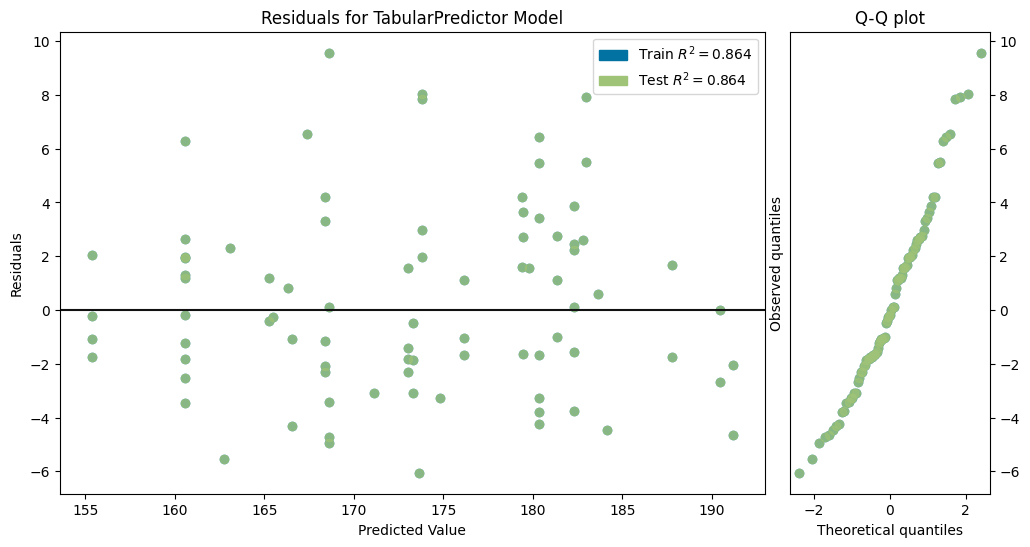

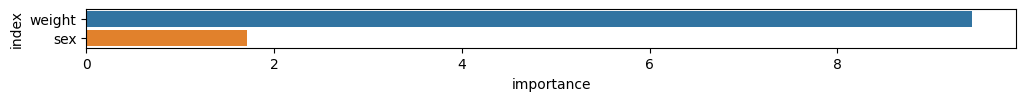

In [19]:
auto.quick_fit(
    train_data=df_train,
    label='height',
    show_feature_importance_barplots=True
)

## C. 관측치별 해석

### 0번 obs

`-` 0번 observation

In [24]:
df_train.iloc[[0]]

In [25]:
predictr.predict(df_train.iloc[[0]])

-   왜 178.642868로 예측했을까?

`-` 해석

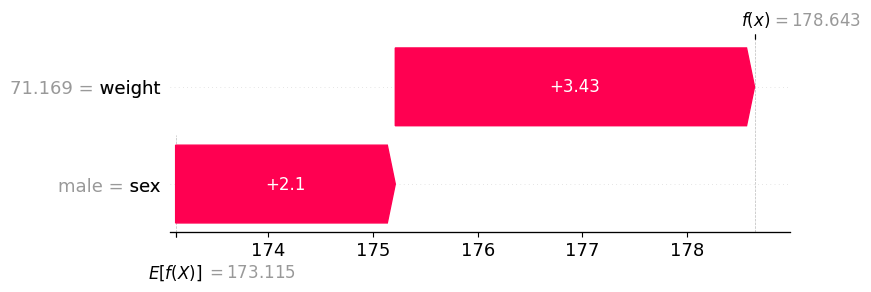

In [32]:
auto.explain_rows(
    train_data= df_train,
    model = predictr,
    rows = df_train.iloc[[0]],
    display_rows= True,
    plot='waterfall'
)

-   왜 178.642868로 예측했을까?
-   일단은 평균값인 173.115에 적합
-   `sex`을 고려하여 +2.1
-   `weight`을 고려하여 +3.77
-   최종적으로는 178.643

### 208번 obs

`-` 208번 observation

In [33]:
df_train.iloc[[208]]

In [34]:
predictr.predict(df_train.iloc[[208]])

-   왜 168.788971로 예측했을까?

`-` 해석

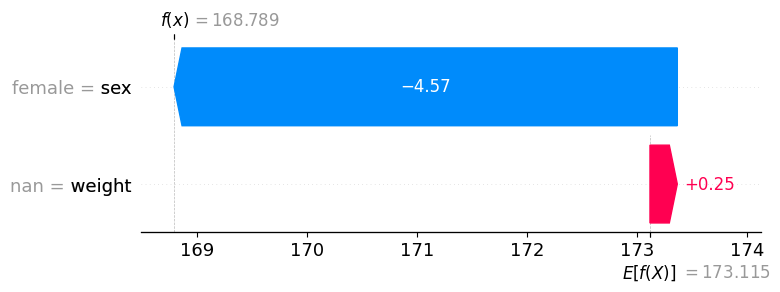

In [36]:
auto.explain_rows(
    train_data= df_train,
    model = predictr,
    rows=df_train.iloc[[208]],
    display_rows= True,
    plot='waterfall'
)

-   왜 178.642868로 예측했을까?
-   일단은 평균값인 173.115에 적합
-   `sex`을 고려하여 -4.57
-   `weight=nan`을 고려하여 +0.25
-   최종적으로는 168.789

> 결측치를 그냥 하나의 관측치로 해석함 (nan이라는 값을 가지고 있다고
> 해석하는 느낌)

> 이게 왜 가능한가? (이런걸 가능하게 하는 테크닉이 많음, nan을 -9999로
> 처리하고 트리를 돌린다고 상상)

### 211번 obs

`-` 211번 observation

In [37]:
df_train.iloc[[211]]

In [38]:
predictr.predict(df_train.iloc[[211]])

`-` 해석

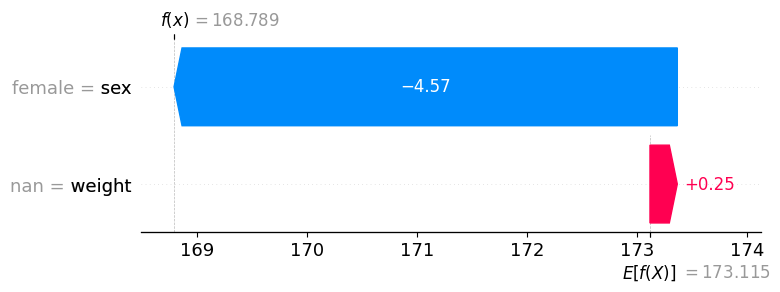

In [39]:
auto.explain_rows(
    train_data= df_train,
    model = predictr,
    rows=df_train.iloc[[208]],
    display_rows= True,
    plot='waterfall'
)

`-` 우리가 생각한 현실적인 적합은 사실 이러함

In [43]:
df_train[df_train.sex =='female'].weight.mean()

In [46]:
onerow = df_train.iloc[[211]].copy()
onerow.weight = 49.567060917121516
onerow

In [47]:
predictr.predict(onerow)

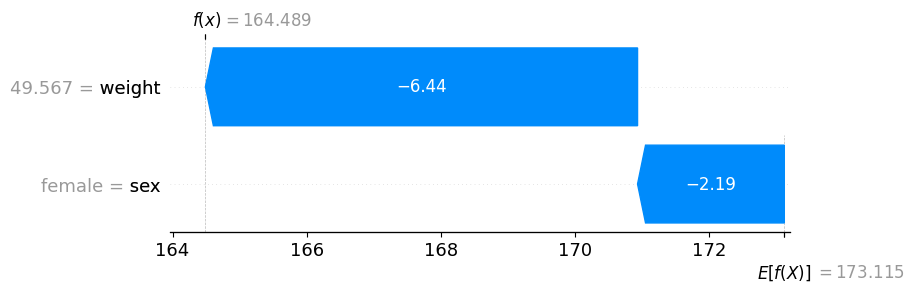

In [48]:
auto.explain_rows(
    train_data= df_train,
    model = predictr,
    rows=onerow,
    display_rows= True,
    plot='waterfall'
)

### 198번 obs

`-` 198번 observation

In [50]:
df_train.iloc[[198]]

In [49]:
predictr.predict(df_train.iloc[[198]])

`-` 해석

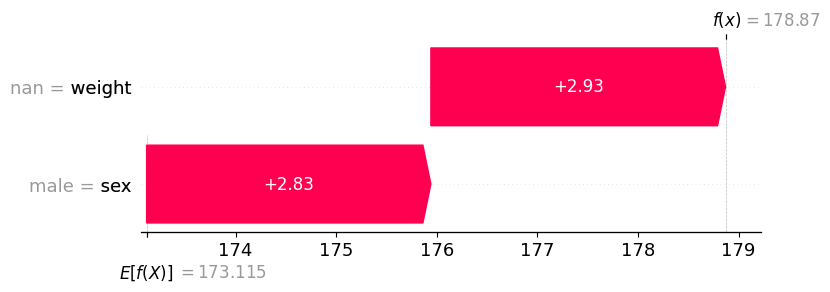

In [51]:
auto.explain_rows(
    train_data= df_train,
    model = predictr,
    rows=df_train.iloc[[198]],
    display_rows= True,
    plot='waterfall'
)